# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)




595

In [2]:

# Turn cities list to df and export to csv
cities_df = pd.DataFrame(cities)
cities_df = cities_df.rename(columns={0:"Cities"})
cities_df['Lat']=""
cities_df['Lng']=""
cities_df['Max Temp']=""
cities_df['Humidity']=""
cities_df['Cloudiness']=""
cities_df['Wind Speed']=""
cities_df['Country']=""
cities_df['Date']=""

cities_df.to_csv(output_data_file)

NameError: name 'cities' is not defined

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
# loop through cities to make list
cities = cities_df['Cities'] . 
count = 1
set_num = 1

print('''
Beginning Data Retrieval
-----------------------------
''')

for city in cities:
    print(f'Processing Record {count} of Set {set_num} | {city}')
    count += 1 
    if count > 50:
        set_num += 1
        count = 1

print('''
-----------------------------
Data Retrieval Complete      
-----------------------------

''')
        

 3 | anito
Processing Record 16 of Set 3 | halmstad
Processing Record 17 of Set 3 | saldanha
Processing Record 18 of Set 3 | mundargi
Processing Record 19 of Set 3 | tiksi
Processing Record 20 of Set 3 | bredasdorp
Processing Record 21 of Set 3 | west wendover
Processing Record 22 of Set 3 | ivanteyevka
Processing Record 23 of Set 3 | namibe
Processing Record 24 of Set 3 | steamboat springs
Processing Record 25 of Set 3 | grindavik
Processing Record 26 of Set 3 | talnakh
Processing Record 27 of Set 3 | kruisfontein
Processing Record 28 of Set 3 | vanimo
Processing Record 29 of Set 3 | jining
Processing Record 30 of Set 3 | tuktoyaktuk
Processing Record 31 of Set 3 | tura
Processing Record 32 of Set 3 | schubelbach
Processing Record 33 of Set 3 | ulaanbaatar
Processing Record 34 of Set 3 | maryborough
Processing Record 35 of Set 3 | palabuhanratu
Processing Record 36 of Set 3 | arraial do cabo
Processing Record 37 of Set 3 | kaitangata
Processing Record 38 of Set 3 | ketchikan
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [2]:
# import csv because I had to reload file
cities_df = pd.read_csv(output_data_file)


cities_df['Lat']=""
cities_df['Lng']=""
cities_df['Max Temp']=""
cities_df['Humidity']=""
cities_df['Cloudiness']=""
cities_df['Wind Speed']=""
cities_df['Country']=""
cities_df['Date']=""
cities_df

,Cities,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapaa,,,,,,,,
1,portland,,,,,,,,
2,punta arenas,,,,,,,,
3,chuy,,,,,,,,
4,victoria,,,,,,,,
...,...,...,...,...,...,...,...,...,...
590,prudentopolis,,,,,,,,
591,zhezkazgan,,,,,,,,
592,penzance,,,,,,,,
593,northam,,,,,,,,


In [3]:
cities = cities_df['Cities']
length = len(cities)
index = 0
count = 0



base_url = "http://api.openweathermap.org/data/2.5/weather?"
params = {
    "units" : "metric",
    "appid": weather_api_key,
    # "q": "kapaa"
}

while index < length :
    while count <50:
        params['q'] = cities.iloc[index:index+1]
        response = requests.get(base_url, params=params).json()

    
        try:
            cities_df.iloc[index,1:2] = response['coord']['lat']
            cities_df.iloc[index,2:3] = response['coord']['lon']
            cities_df.iloc[index,3:4] = response['main']['temp_max']
            cities_df.iloc[index,4:5] = response['main']['humidity']
            cities_df.iloc[index,5:6] = response['clouds']['all']
            cities_df.iloc[index,6:7] = response['wind']['speed']
            cities_df.iloc[index,7:8] = response['sys']['country']
            cities_df.iloc[index,8:9] = response['dt']
        except (KeyError, IndexError):
            print(f"Error with {cities.iloc[index:index+1]}")



        count += 1 
        index += 1
    count = 0
cities_df.to_csv('output_data/final_cities.csv')
cities_df

Error with 18    illoqqortoormiut
Name: Cities, dtype: object
Error with 44    attawapiskat
Name: Cities, dtype: object
Error with 57    vaitupu
Name: Cities, dtype: object
Error with 60    tarudant
Name: Cities, dtype: object
Error with 90    taolanaro
Name: Cities, dtype: object
Error with 97    sentyabrskiy
Name: Cities, dtype: object
Error with 134    palabuhanratu
Name: Cities, dtype: object
Error with 141    barentsburg
Name: Cities, dtype: object
Error with 142    tsihombe
Name: Cities, dtype: object
Error with 164    marcona
Name: Cities, dtype: object
Error with 168    grand river south east
Name: Cities, dtype: object
Error with 182    karamea
Name: Cities, dtype: object
Error with 185    nizhneyansk
Name: Cities, dtype: object
Error with 194    belushya guba
Name: Cities, dtype: object
Error with 198    mys shmidta
Name: Cities, dtype: object
Error with 215    alotau
Name: Cities, dtype: object
Error with 234    samusu
Name: Cities, dtype: object
Error with 243    bargal
Nam

,Cities,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapaa,22.08,-159.32,24,83,40,4.6,US,1589608923
1,portland,45.52,-122.68,14.44,71,20,1.5,US,1589608872
2,punta arenas,-53.15,-70.92,5,93,90,3.6,CL,1589608923
3,chuy,-33.7,-53.46,12.73,75,18,5.31,UY,1589608923
4,victoria,22.29,114.16,31.11,66,8,7.15,HK,1589608661
...,...,...,...,...,...,...,...,...,...
590,prudentopolis,-25.21,-50.98,10.24,99,28,0.56,BR,1589608901
591,zhezkazgan,47.8,67.71,23,40,75,4,KZ,1589609066
592,penzance,50.12,-5.54,9.44,87,82,3.1,GB,1589609066
593,northam,51.03,-4.22,7.78,93,97,0.89,GB,1589609066


In [10]:
# had to reconnect file agaim
cities_df = pd.read_csv("output_data/final_cities.csv",index_col=0)

cities_df

,Cities,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapaa,22.08,-159.32,24.00,83.0,40.0,4.60,US,1.589609e+09
1,portland,45.52,-122.68,14.44,71.0,20.0,1.50,US,1.589609e+09
2,punta arenas,-53.15,-70.92,5.00,93.0,90.0,3.60,CL,1.589609e+09
3,chuy,-33.70,-53.46,12.73,75.0,18.0,5.31,UY,1.589609e+09
4,victoria,22.29,114.16,31.11,66.0,8.0,7.15,HK,1.589609e+09
...,...,...,...,...,...,...,...,...,...
590,prudentopolis,-25.21,-50.98,10.24,99.0,28.0,0.56,BR,1.589609e+09
591,zhezkazgan,47.80,67.71,23.00,40.0,75.0,4.00,KZ,1.589609e+09
592,penzance,50.12,-5.54,9.44,87.0,82.0,3.10,GB,1.589609e+09
593,northam,51.03,-4.22,7.78,93.0,97.0,0.89,GB,1.589609e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
clean_df = cities_df.drop(cities_df[cities_df['Humidity'] >100].index)
clean_df

,Cities,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapaa,22.08,-159.32,24.00,83.0,40.0,4.60,US,1.589609e+09
1,portland,45.52,-122.68,14.44,71.0,20.0,1.50,US,1.589609e+09
2,punta arenas,-53.15,-70.92,5.00,93.0,90.0,3.60,CL,1.589609e+09
3,chuy,-33.70,-53.46,12.73,75.0,18.0,5.31,UY,1.589609e+09
4,victoria,22.29,114.16,31.11,66.0,8.0,7.15,HK,1.589609e+09
...,...,...,...,...,...,...,...,...,...
590,prudentopolis,-25.21,-50.98,10.24,99.0,28.0,0.56,BR,1.589609e+09
591,zhezkazgan,47.80,67.71,23.00,40.0,75.0,4.00,KZ,1.589609e+09
592,penzance,50.12,-5.54,9.44,87.0,82.0,3.10,GB,1.589609e+09
593,northam,51.03,-4.22,7.78,93.0,97.0,0.89,GB,1.589609e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.
n/a

Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
n/a

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [9]:
# Extract relevant fields from the data frame
n/a

# Export the City_Data into a csv
n/a

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

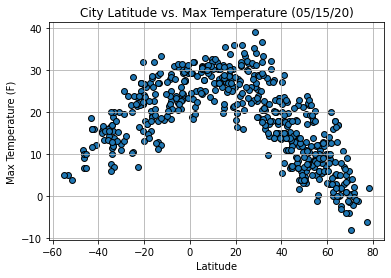

In [57]:
cities_df.plot(kind= 'scatter',x='Lat',y='Max Temp',s=35,edgecolors='black')
plt.title("City Latitude vs. Max Temperature (05/15/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(ls='-')
plt.savefig('output_data/Latitude vs. Temperature Plot.png')
plt.show()

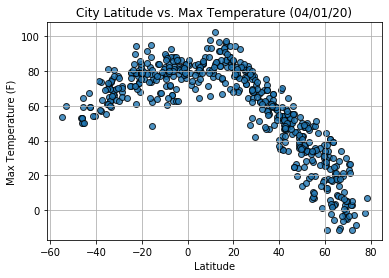

In [10]:
cities_df.plot.scatter(cities_df['Lat'],cities_df['Max Temp'])

## Latitude vs. Humidity Plot

cities_df.plot(kind= 'scatter',x='Lat',y='Humidity',s=35,edgecolors='black')
plt.title("City Latitude vs. Humidity (05/15/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(ls='-')
plt.savefig('output_data/Latitude vs. Humidity Plot.png')
plt.show()

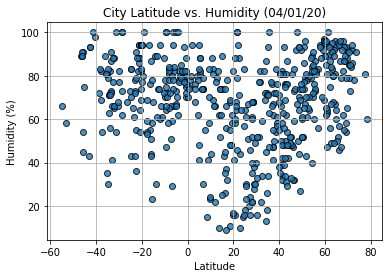

## Latitude vs. Cloudiness Plot

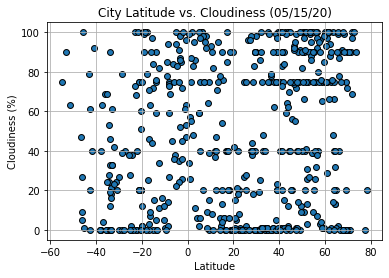

In [59]:
cities_df.plot(kind= 'scatter',x='Lat',y='Cloudiness',s=35,edgecolors='black')
plt.title("City Latitude vs. Cloudiness (05/15/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(ls='-')
plt.savefig('output_data/Latitude vs. Cloudiness Plot.png')
plt.show()

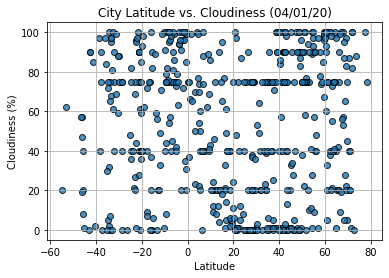

In [12]:
cities_df.plot(kind= 'scatter',x='Lat',y='Cloudiness',edgecolors='black')
plt.title("City Latitude vs. Cloudiness (05/15/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(ls='-')
plt.show()

## Latitude vs. Wind Speed Plot

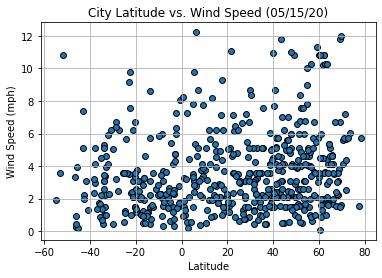

In [69]:
cities_df.plot(kind= 'scatter',x='Lat',y='Wind Speed',s=35,edgecolors='black')
plt.title("City Latitude vs. Wind Speed (05/15/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(ls='-')
plt.savefig('output_data/Latitude vs. Wind Plot.png')
plt.show()

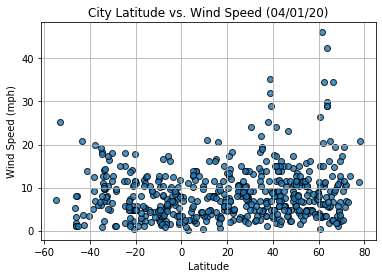

## Linear Regression

In [125]:
# OPTIONAL: Create a function to create Linear Regression plots
def make_linregress(df,topic):
    weather_slope, weather_int, weather_r, weather_p, weather_std_err = stats.linregress(df['Lat'], topic)
    weather_fit = weather_slope * df['Lat'] + weather_int
    plt.plot(df['Lat'],weather_fit,"--",color='Red')
    line_eq = "y = " + str(round(weather_slope,2)) + "x + " + str(round(weather_int,2))
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    plt.annotate(line_eq,(-6,10),fontsize=15,color="red")
    print(f"The r-squared is: {weather_r**2}")


In [73]:
# Create Northern and Southern Hemisphere DataFrames

north_cities_df = cities_df[cities_df['Lat'] > 0]
south_cities_df = cities_df[cities_df['Lat'] < 0]

,Cities,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapaa,22.08,-159.32,24.00,83.0,40.0,4.60,US,1.589609e+09
1,portland,45.52,-122.68,14.44,71.0,20.0,1.50,US,1.589609e+09
4,victoria,22.29,114.16,31.11,66.0,8.0,7.15,HK,1.589609e+09
5,provideniya,64.38,-173.30,4.96,66.0,13.0,5.36,RU,1.589609e+09
8,vilkaviskis,54.65,23.03,8.94,78.0,39.0,7.83,LT,1.589609e+09
...,...,...,...,...,...,...,...,...,...
589,praia da vitoria,38.73,-27.07,18.00,93.0,75.0,4.04,PT,1.589609e+09
591,zhezkazgan,47.80,67.71,23.00,40.0,75.0,4.00,KZ,1.589609e+09
592,penzance,50.12,-5.54,9.44,87.0,82.0,3.10,GB,1.589609e+09
593,northam,51.03,-4.22,7.78,93.0,97.0,0.89,GB,1.589609e+09


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6859091776888212


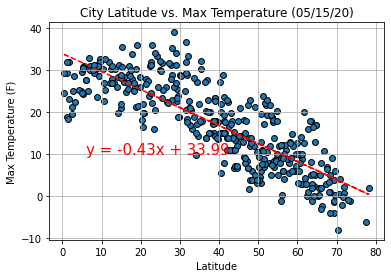

In [126]:
north_cities_df.plot(kind= 'scatter',x='Lat',y='Max Temp',s=35,edgecolors='black')
plt.title("City Latitude vs. Max Temperature (05/15/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(ls='-')
make_linregress(north_cities_df,north_cities_df['Max Temp'])
plt.savefig('output_data/Northern Temperature Plot.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5322712662045281


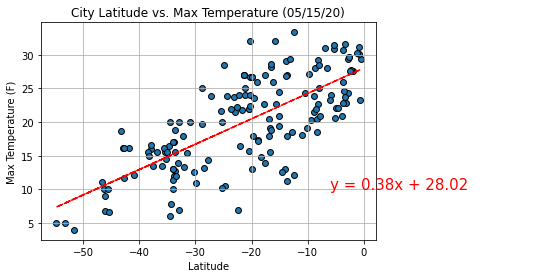

In [127]:
south_cities_df.plot(kind= 'scatter',x='Lat',y='Max Temp',s=35,edgecolors='black')
plt.title("City Latitude vs. Max Temperature (05/15/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(ls='-')
make_linregress(south_cities_df,south_cities_df['Max Temp'])
plt.savefig('output_data/Southern Temperature Plot.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0050518517165190555


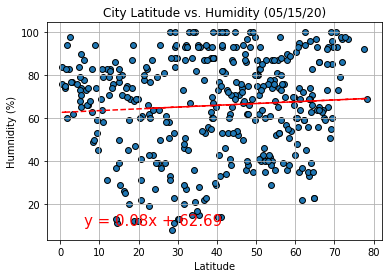

In [128]:
north_cities_df.plot(kind= 'scatter',x='Lat',y='Humidity',s=35,edgecolors='black')
plt.title("City Latitude vs. Humidity (05/15/20)")
plt.xlabel("Latitude")
plt.ylabel("Humnidity (%)")
plt.grid(ls='-')
make_linregress(north_cities_df,north_cities_df['Humidity'])
plt.savefig('output_data/Northern Humidity Plot.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.028951559858134836


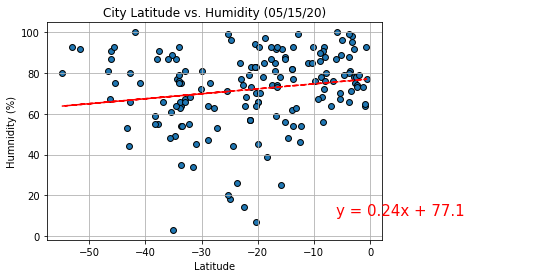

In [129]:
south_cities_df.plot(kind= 'scatter',x='Lat',y='Humidity',s=35,edgecolors='black')
plt.title("City Latitude vs. Humidity (05/15/20)")
plt.xlabel("Latitude")
plt.ylabel("Humnidity (%)")
plt.grid(ls='-')
make_linregress(south_cities_df,south_cities_df['Humidity'])
plt.savefig('output_data/Southern Humidity Plot.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.02480287823802545


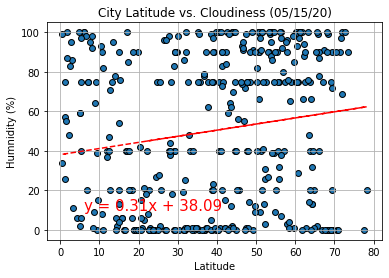

In [130]:
north_cities_df.plot(kind= 'scatter',x='Lat',y='Cloudiness',s=35,edgecolors='black')
plt.title("City Latitude vs. Cloudiness (05/15/20)")
plt.xlabel("Latitude")
plt.ylabel("Humnidity (%)")
plt.grid(ls='-')
make_linregress(north_cities_df,north_cities_df['Cloudiness'])
plt.savefig('output_data/Northern Cloudiness Plot.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06928178028838072


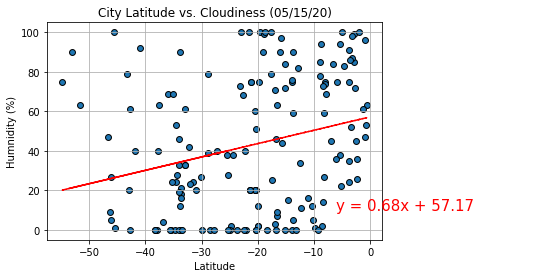

In [131]:
south_cities_df.plot(kind= 'scatter',x='Lat',y='Cloudiness',s=35,edgecolors='black')
plt.title("City Latitude vs. Cloudiness (05/15/20)")
plt.xlabel("Latitude")
plt.ylabel("Humnidity (%)")
plt.grid(ls='-')
make_linregress(south_cities_df,south_cities_df['Cloudiness'])
plt.savefig('output_data/Southern Cloudiness Plot.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.015897744260873842


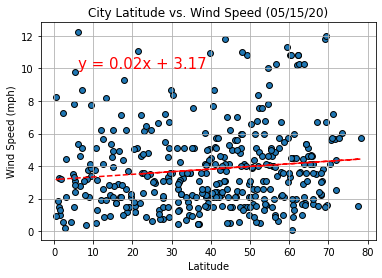

In [132]:
north_cities_df.plot(kind= 'scatter',x='Lat',y='Wind Speed',s=35,edgecolors='black')
plt.title("City Latitude vs. Wind Speed (05/15/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(ls='-')
make_linregress(north_cities_df,north_cities_df['Wind Speed'])
plt.savefig('output_data/Northern Wind Speed Plot.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0025199987671196498


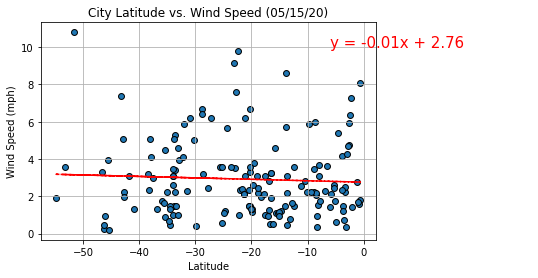

In [133]:
south_cities_df.plot(kind= 'scatter',x='Lat',y='Wind Speed',s=35,edgecolors='black')
plt.title("City Latitude vs. Wind Speed (05/15/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(ls='-')
make_linregress(south_cities_df,south_cities_df['Wind Speed'])
plt.savefig('output_data/Southern Wind Speed Plot.png')
plt.show()